<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>RSNET</center></b>
</div>

# Configure Learning Environment

In [1]:
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [2]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)
rsp.fixMemoryProblem()

2021-07-12 20:14:10.993491: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-07-12 20:14:12.264622: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-07-12 20:14:12.285806: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-12 20:14:12.285829: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jupyterlab
2021-07-12 20:14:12.285835: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jupyterlab
2021-07-12 20:14:12.285961: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.42.1
2021-07-12 20:14:12.285982: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 455.32.0
2021-07-12 20:14:12.285987: E tensorflow/stream

In [3]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import tensorflow as tf
from tensorflow.keras import utils, layers, activations, models, losses, optimizers, metrics, callbacks, datasets, preprocessing

In [5]:
tf.__version__

'2.4.1'

# CIFAR10 Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [6]:
# Download the mnist dataset using keras
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
# Counting unique value of train data
unique, counts = np.unique(train_label, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}'

# Preprocessing

In [8]:
# Normalizing
train_data_proc = train_data / 255
test_data_proc = test_data / 255

#One hot encoding
train_label_proc = utils.to_categorical(train_label, 10)
test_label_proc = utils.to_categorical(test_label, 10)

In [9]:
image_gen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.05,
    zoom_range=0.3
)
train_gen = image_gen.flow(train_data_proc, train_label_proc, batch_size=128)

# Create Model

In [10]:
mInput = layers.Input((32, 32, 3))

In [11]:
mB1 = layers.Conv2D(64, 3, padding="same", activation="relu", name="B1_Conv_1")(mInput)
mB1 = layers.BatchNormalization(name="B1_Norm_1")(mB1)
mB1 = layers.Conv2D(64, 3, padding="same", activation="relu", name="B1_Conv_2")(mB1)
mB1 = layers.BatchNormalization(name="B1_Norm_2")(mB1)
mB1 = layers.MaxPool2D(2, strides=1, name="B1_Pool")(mB1)
mB1 = layers.Dropout(0.5, name="B1_Drop")(mB1)

2021-07-12 20:14:13.069716: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-12 20:14:13.074524: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3793000000 Hz
2021-07-12 20:14:13.075198: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558196b7cde0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-07-12 20:14:13.075210: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [12]:
# mB2 = layers.Conv2D(64, 3, padding="same", activation="relu", name="B2_Conv_1")(mB1)
# mB2 = layers.BatchNormalization(name="B2_Norm_1")(mB2)
# mB2 = layers.Conv2D(128, 3, dilation_rate=2, activation="relu", name="B2_Conv_2")(mB2)
# mB2 = layers.BatchNormalization(name="B2_Norm_2")(mB2)
# mB2 = layers.MaxPool2D(2, strides=1, name="B2_Pool")(mB2)
# mB2 = layers.Dropout(0.5, name="B2_Drop")(mB2)

In [13]:
mB3     = layers.Conv2D(128, 3, padding="same", activation="relu", name="B3_Conv_1")(mB1)
mB3     = layers.BatchNormalization(name="B3_Norm_1")(mB3)
mB3     = layers.Conv2D(256, 3, padding="same", dilation_rate=2, activation="relu", name="B3_Conv_2")(mB3)
mB3     = layers.BatchNormalization(name="B3_Norm_2")(mB3)
mB3Pool = layers.MaxPool2D(2, strides=1, name="B3_Pool")(mB3)
mB3     = layers.Dropout(0.5, name="B3_Drop")(mB3Pool)

In [14]:
mB4     = layers.Conv2D(128, 3, padding="same", activation="relu", name="B4_Conv_1")(mB3)
mB4     = layers.BatchNormalization(name="B4_Norm_1")(mB4)
mB4     = layers.Conv2D(256, 3, padding="same", activation="relu", name="B4_Conv_2")(mB4)
mB4     = layers.add([mB4, mB3Pool], name="B4_Add")
mB4Nor  = layers.BatchNormalization(name="B4_Norm_2")(mB4)
mB4Dout = layers.Dropout(0.5, name="B4_Drop")(mB4Nor)

In [15]:
mB5 = layers.Conv2D(128, 3, dilation_rate=2, padding="same", activation="relu", name="B5_Conv_1")(mB4Nor)
mB5 = layers.BatchNormalization(name="B5_Norm")(mB5)
mB5 = layers.Conv2D(256, 3, dilation_rate=3, padding="same", activation="relu", name="B5_Conv_2")(mB5)

In [16]:
mB6 = layers.Conv2D(128, 5, padding="same", activation="relu", name="B6_Conv_1")(mB4Nor)
mB6 = layers.BatchNormalization(name="B6_Norm")(mB6)
mB6 = layers.Conv2D(256, 5, padding="same", activation="relu", name="B6_Conv_2")(mB6)

In [17]:
mB7 = layers.Conv2D(128, 3, padding="same", activation="relu", name="B7_Conv_1")(mB4Dout)
mB7 = layers.BatchNormalization(name="B7_Norm_1")(mB7)
mB7 = layers.Conv2D(256, 3, padding="same", activation="relu", name="B7_Conv_2")(mB7)
mB7 = layers.add([mB5, mB6, mB7], name="B7_Add")
mB7 = layers.BatchNormalization(name="B7_Norm_2")(mB7)
mB7 = layers.Dropout(0.5, name="B7_Drop")(mB7)

In [18]:
mB8 = layers.Conv2D(128, 3, padding="same", activation="relu", name="B8_Conv_1")(mB7)
mB8 = layers.BatchNormalization(name="B8_Norm_1")(mB8)
mB8 = layers.Conv2D(256, 3, padding="same", dilation_rate=2, activation="relu", name="B8_Conv_2")(mB8)
mB8 = layers.add([mB3Pool, mB5, mB7, mB8], name="B8_Add")
mB8 = layers.BatchNormalization(name="B8_Norm_2")(mB8)
mB8 = layers.Dropout(0.5, name="B8_Drop")(mB8)

In [19]:
mB9 = layers.Conv2D(256, 3, activation="relu", name="B9_Conv_1")(mB8)
mB9 = layers.BatchNormalization(name="B9_Norm_1")(mB9)
mB9 = layers.Conv2D(256, 3, dilation_rate=2, activation="relu", name="B9_Conv_2")(mB9)
mB9 = layers.BatchNormalization(name="B9_Norm_2")(mB9)
mB9 = layers.MaxPool2D(2, name="B9_Pool")(mB9)
mB9 = layers.Dropout(0.5, name="B9_Drop")(mB9)

In [20]:
mB10 = layers.Conv2D(512, 3, padding="same", activation="relu", name="B8_Conv")(mB9)
mB10 = layers.GlobalAveragePooling2D(name="B10_Pool")(mB10)
mB10 = layers.BatchNormalization(name="B10_Norm")(mB10)

In [21]:
mOutput = layers.Dense(10, activation="softmax", name="Output")(mB10)

In [22]:
model = models.Model(mInput, mOutput)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
B1_Conv_1 (Conv2D)              (None, 32, 32, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
B1_Norm_1 (BatchNormalization)  (None, 32, 32, 64)   256         B1_Conv_1[0][0]                  
__________________________________________________________________________________________________
B1_Conv_2 (Conv2D)              (None, 32, 32, 64)   36928       B1_Norm_1[0][0]                  
______________________________________________________________________________________________

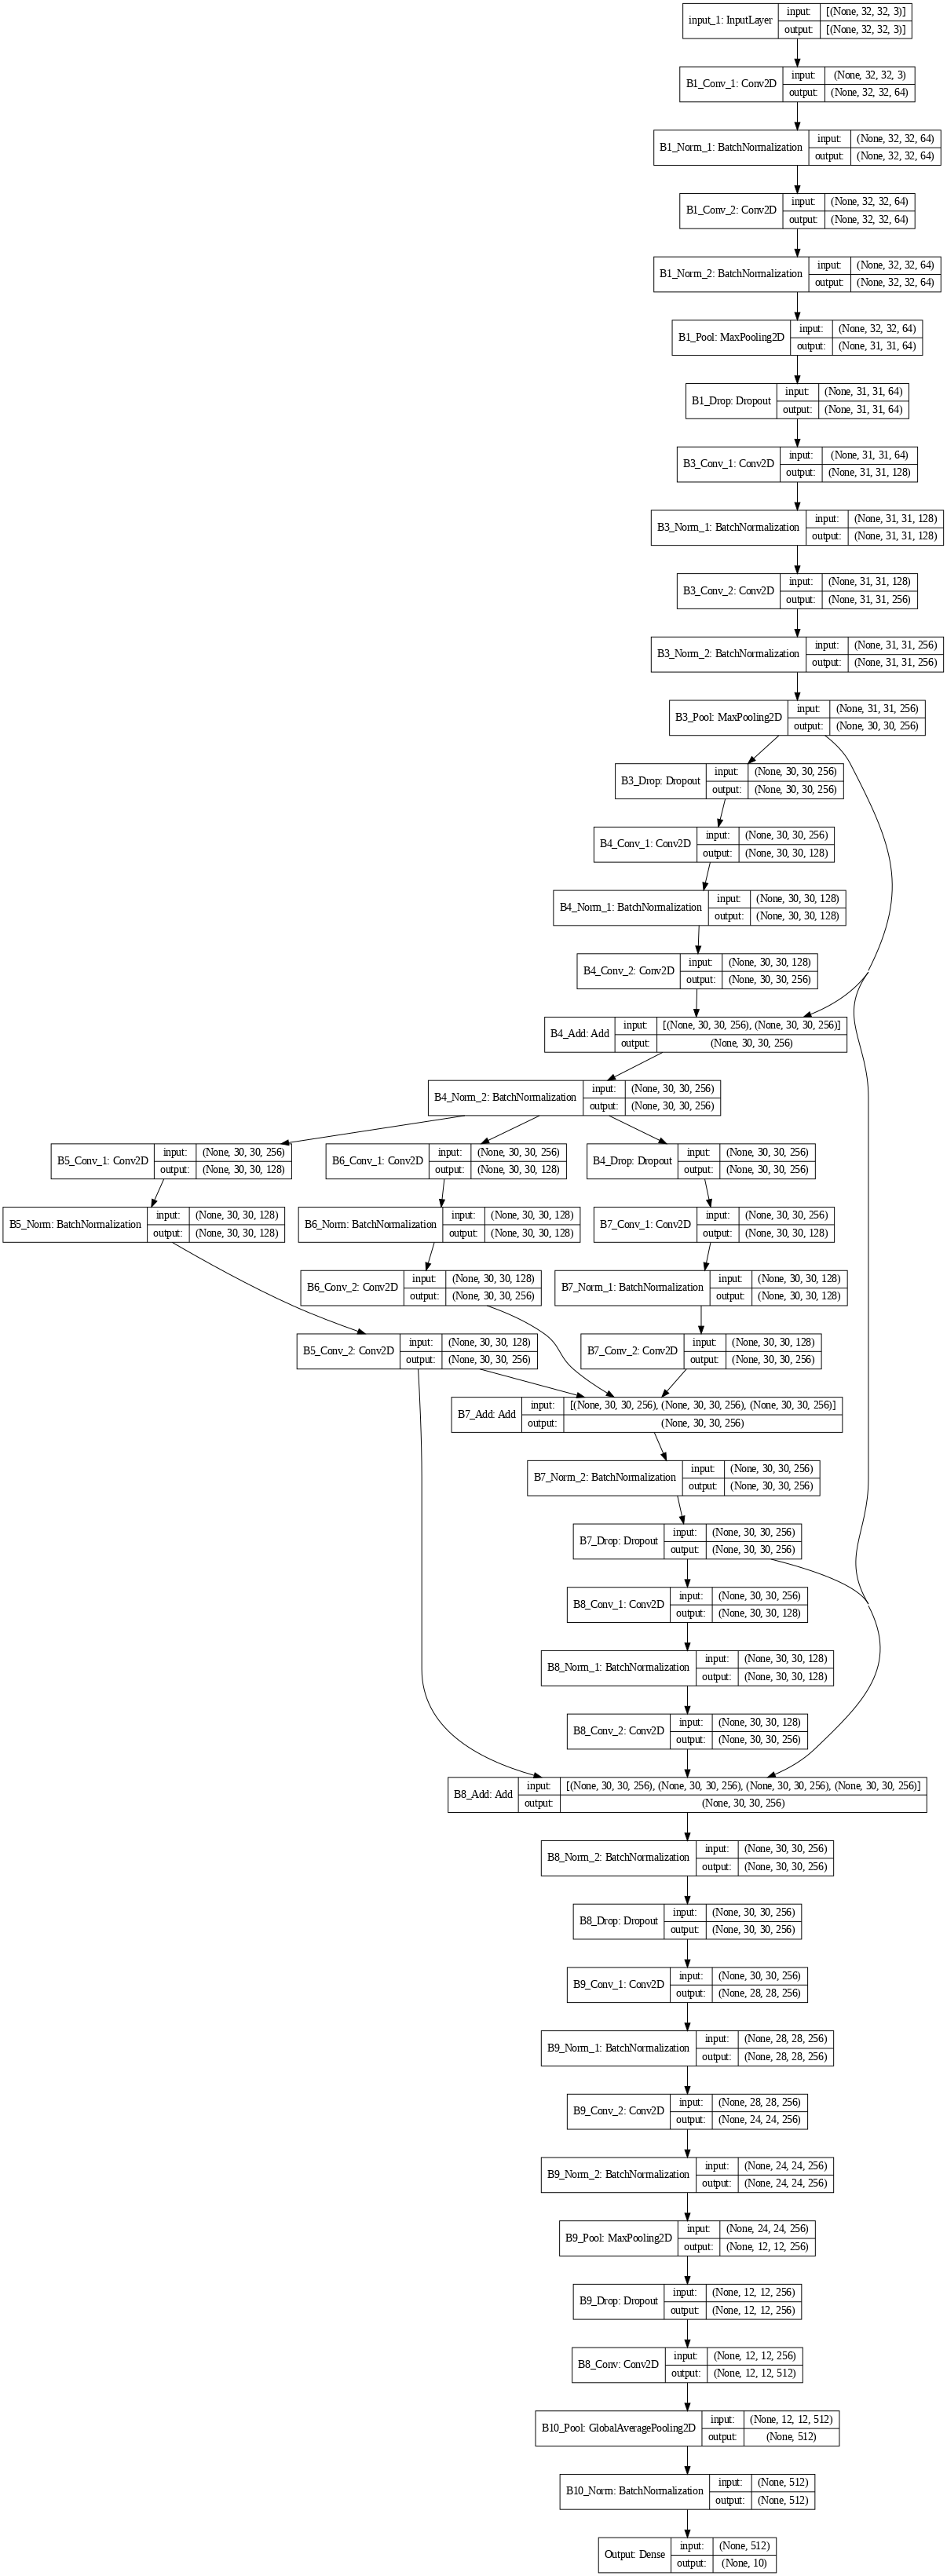

In [23]:
utils.plot_model(model, "intermediate/model.png", True, dpi=70)

In [24]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adadelta(),
    metrics=[metrics.CategoricalAccuracy()],
)

In [ ]:
history_aug = model.fit(
    train_gen,
    validation_data=(test_data_proc, test_label_proc),
    epochs=100
)

2021-07-12 20:14:13.722951: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
391/391 [==============================] - 3441s 9s/step - loss: 2.4416 - categorical_accuracy: 0.1587 - val_loss: 3.6778 - val_categorical_accuracy: 0.1022
Epoch 2/100
391/391 [==============================] - 3419s 9s/step - loss: 2.0577 - categorical_accuracy: 0.2493 - val_loss: 3.2770 - val_categorical_accuracy: 0.1556
Epoch 3/100
391/391 [==============================] - 3420s 9s/step - loss: 1.9823 - categorical_accuracy: 0.2673 - val_loss: 2.8688 - val_categorical_accuracy: 0.2022
Epoch 4/100
391/391 [==============================] - 3419s 9s/step - loss: 1.9330 - categorical_accuracy: 0.2932 - val_loss: 2.8563 - val_categorical_accuracy: 0.2124
Epoch 5/100
391/391 [==============================] - 3417s 9s/step - loss: 1.8923 - categorical_accuracy: 0.3058 - val_loss: 2.6224 - val_categorical_accuracy: 0.2372
Epoch 6/100
391/391 [==============================] - 3418s 9s/step - loss: 1.8645 - categorical_accuracy: 0.3175 - val_loss: 2.6701 - val_categorical_acc

In [ ]:
pd.DataFrame(history_aug.history).plot()

# Predict

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

@interact(idx=(0, 9999, 1))
def showTestImage(idx):
    data = test_data[idx].reshape(-1, 32, 32, 3)/255
    dataPred = model.predict(data)
    
    plt.imshow(test_data[idx])
    plt.grid(False)
    plt.title(f"LABEL: {class_names[test_label[idx][0]]}, PREDICT: {class_names[np.argmax(dataPred)]}")
    plt.show()

# Error Find

In [ ]:
err_idx = []
pred_result = model.predict(test_data_proc)

for idx in range(10000):
    if np.argmax(pred_result[idx]) != test_label[idx][0]:
        err_idx.append(idx)

In [ ]:
len(err_idx), err_idx